In [19]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import lfilter
from scipy import signal
import scipy
import math
from iir_biquad import iir_biquad as iir_biquad_patrick
from iir_biquad import test as test_patrick
from IIRSim import *
from FrequencyResponse import *


In [2]:
notch_freq = 375
b, a = signal.iirnotch(notch_freq, 2, 3000)
pole = signal.tf2zpk(b,a)[1][0]
zero = signal.tf2zpk(b,a)[0][0]
pmag=np.abs(pole)
pangle=np.angle(pole)
zmag=np.abs(zero)
zangle=np.angle(zero)
print(pmag, pangle)

0.8174219460714881 0.7647942826477958


<Figure size 640x480 with 0 Axes>

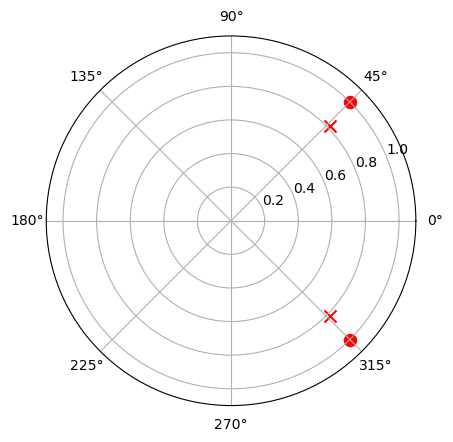

In [3]:
plot_filter_polezero(zmag, zangle, pmag, pangle)

In [4]:
samples = 1000
sample_freqs =  np.linspace(0,0.99,samples)
freq_response = eval_biquad_filter_DFT(zmag, zangle, pmag, pangle, sample_freqs)
freq_response_quantized = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0)

In [5]:
freq_response_quantized_0p5 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.5)

In [16]:
freq_response_quantized_0p1 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.1)

In [14]:
freq_response_quantized_0p01 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.01)

In [11]:
freq_response_quantized_0p001 = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*1000, amplitude=False, phase=0, in_amplitude=0.001)

In [12]:
# freq_response_quantized_smalln = eval_biquad_quantized_DFT(b, a, sample_freqs, internal_samples=8*100, amplitude=False, phase=0)

In [34]:
cmap = plt.cm.inferno#plasma
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
#=cmap(norm(df.c.values))

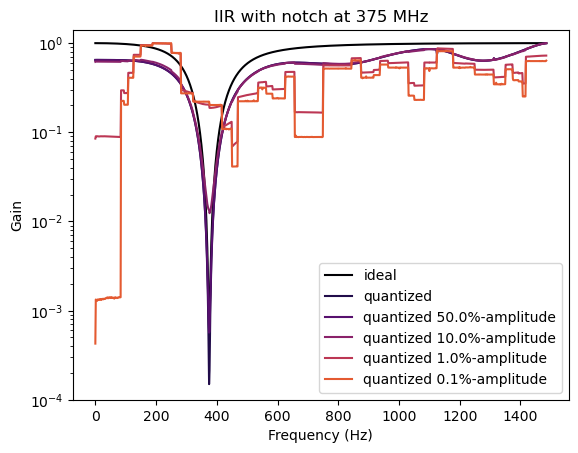

In [35]:
sample_freqs_scaled = sample_freqs * 1500
plt.semilogy(sample_freqs_scaled,freq_response, label="ideal", color = cmap(norm(0)))
plt.semilogy(sample_freqs_scaled,freq_response_quantized, label="quantized", color = cmap(norm(1)))
# plt.semilogy(sample_freqs_scaled,freq_response_quantized_smalln, label="quantized small n")
plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p5, label="quantized 50.0%-amplitude", color = cmap(norm(2)))
plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p1, label="quantized 10.0%-amplitude", color = cmap(norm(3)))
plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p01, label="quantized 1.0%-amplitude", color = cmap(norm(4)))
plt.semilogy(sample_freqs_scaled,freq_response_quantized_0p001, label="quantized 0.1%-amplitude", color = cmap(norm(5)))
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.ylim(0.0001,1.4)
plt.title("IIR with notch at %s MHz"%(notch_freq))
# plt.xlim(700,800)
plt.show()